## Leaky Integrator

Let's analyze the impulse response of a 1st order feedback filter.

<function matplotlib.pyplot.show(close=None, block=None)>

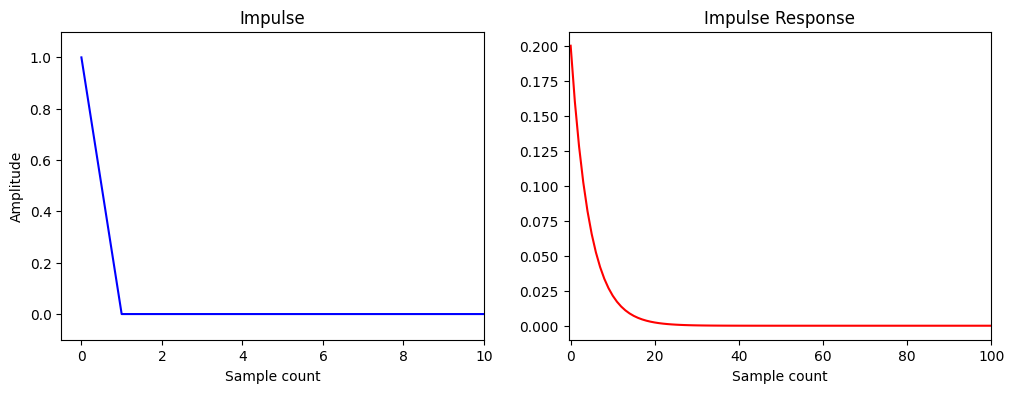

In [15]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use(['science', 'notebook', 'grid'])

frameSize = 2048

def leakyIntegrator(x, alpha):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        y[n] = (1 - alpha) * x[n] + alpha * y[n-1]
    return y


impulse = np.zeros(frameSize)
impulse[0] = 1;

impulseResponse = leakyIntegrator(impulse, 4/5)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(impulse, 'b-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.5, 10)
ax.set_title("Impulse")

ax = axes[1]
ax.plot(impulseResponse, 'r-')
ax.set_xlabel('Sample count')
#ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-0.5, 100)
ax.set_title("Impulse Response")

plt.show

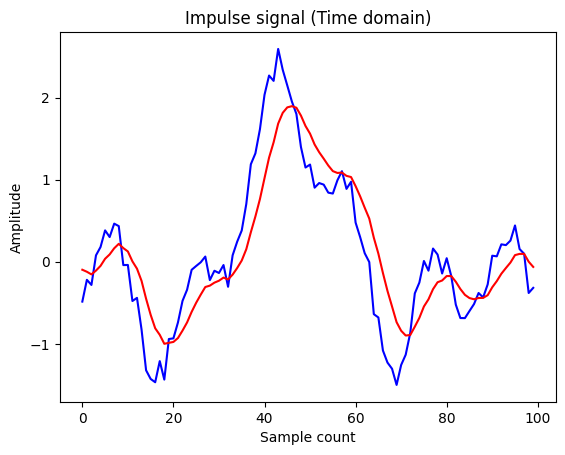

interactive(children=(FloatSlider(value=0.8, description='alpha', max=2.4000000000000004, min=-0.8), Output())…

In [8]:
import ipywidgets as widgets

@widgets.interact
def execute(alpha=0.8):
    length = 100;
    array = np.linspace(-np.pi, np.pi, length)
    signal = np.sin(1.3*array+1.9) + 0.7 * np.sin(2.4*array+2.3) + 0.6 * np.sin(5.7*array+4.3)
    noise = np.random.rand(length) * 0.4
    noisySignal = signal + noise

    plt.plot(noisySignal, 'b-')
    plt.plot(leakyIntegrator(noisySignal, alpha), 'r-')

    plt.xlabel('Sample count')
    plt.ylabel('Amplitude')
    #plt.xlim(-0.5, 10)
    plt.title("Impulse signal (Time domain)")

    plt.show

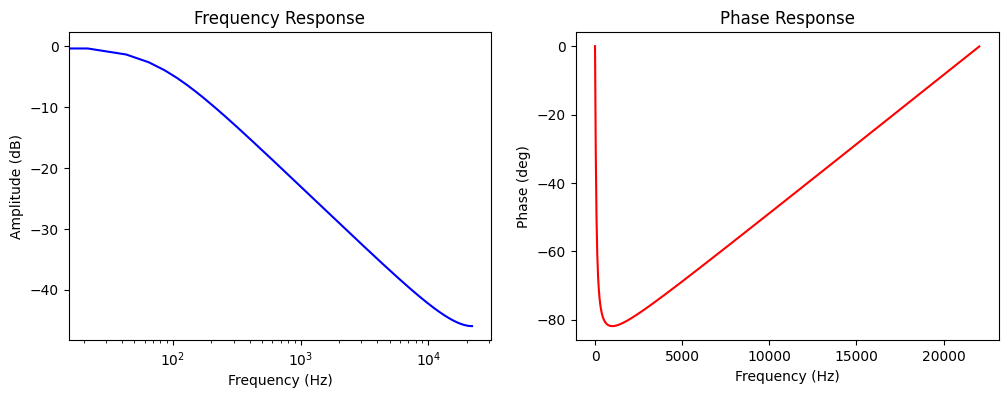

In [25]:
from scipy.fftpack import fft

sampleRate = 44100
spectrum = fft(impulseResponse)

x = np.linspace(0, spectrum.size * sampleRate / frameSize / 2 , spectrum.size//2)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
with np.errstate(divide='ignore'):
    y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]
    
ax.plot(x, y, 'b')
ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')
ax.set_title("Frequency Response")

ax = axes[1]
y = np.degrees(np.angle(spectrum))[:spectrum.size//2]
ax.plot(x, y, 'r')
#ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (deg)')
ax.set_title("Phase Response")

plt.show()

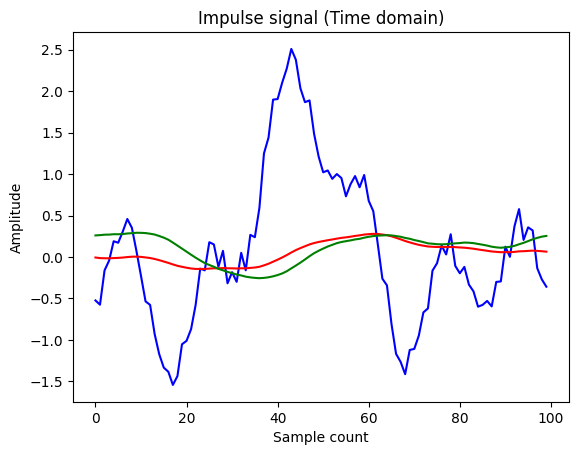

interactive(children=(IntSlider(value=80, description='M', max=240, min=-80), Output()), _dom_classes=('widget…

In [24]:
def movingAverage(x, length):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        sum = 0.0
        for k in range(0, length):
            sum += x[n-k]
        y[n] = sum / length
    return y


@widgets.interact
def execute(M=80):
    length = 100;
    array = np.linspace(-np.pi, np.pi, length)
    signal = np.sin(1.3*array+1.9) + 0.7 * np.sin(2.4*array+2.3) + 0.6 * np.sin(5.7*array+4.3)
    noise = np.random.rand(length) * 0.4
    noisySignal = signal + noise

    plt.plot(noisySignal, 'b-')
    plt.plot(leakyIntegrator(noisySignal, (M-1)/M), 'r-')
    plt.plot(movingAverage(noisySignal, M), 'g-')

    plt.xlabel('Sample count')
    plt.ylabel('Amplitude')
    #plt.xlim(-0.5, 10)
    plt.title("Impulse signal (Time domain)")

    plt.show